In [1]:
import pandas as pd
from pathlib import Path
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
import numpy as np
from sklearn.metrics import accuracy_score
pd.options.display.float_format = '{:,.3f}'.format
data_dir = Path("datasets")
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

In [2]:
# Adult: predict >50K
filepath = data_dir / 'adult' / 'data.csv'
columns = ['age', 'workclass', 'fnlwgt', 'education', 'education-num',
 'marital-status',  'occupation', 'relationship', 'race',
 'sex', 'capital-gain', 'capital-loss', 'hours-per-week',
 'native_country', 'salary']
adult = pd.read_csv(filepath, na_values=[" ?"], names=columns, header=0)
adult['salary'] = adult.salary.str.contains('>50K').astype(int) #above "50k" or "50k."

## 4. Data description

## 4.A.

In [3]:
print(f"There are: {adult.shape[0]} observations in the data")

There are: 48842 observations in the data


## Data Proccessing

We have found that each string feature starts with a leading " " (whitespace) 
and we have decided to use strip in order to remove it

In [4]:
for col in adult:
    if adult[col].dtype == 'object':
        adult[col] = adult[col].str.strip()

## 4.B.

In [5]:
print(f"There are: {adult.shape[1]} features in the data")
adult.info()

There are: 15 features in the data
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             48842 non-null  int64 
 1   workclass       46043 non-null  object
 2   fnlwgt          48842 non-null  int64 
 3   education       48842 non-null  object
 4   education-num   48842 non-null  int64 
 5   marital-status  48842 non-null  object
 6   occupation      46033 non-null  object
 7   relationship    48842 non-null  object
 8   race            48842 non-null  object
 9   sex             48842 non-null  object
 10  capital-gain    48842 non-null  int64 
 11  capital-loss    48842 non-null  int64 
 12  hours-per-week  48842 non-null  int64 
 13  native_country  47985 non-null  object
 14  salary          48842 non-null  int32 
dtypes: int32(1), int64(6), object(8)
memory usage: 5.4+ MB


## 4.C.

0   0.761
1   0.239
Name: salary, dtype: float64


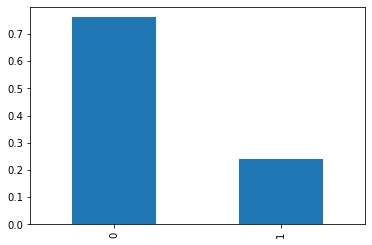

In [6]:
print(adult['salary'].value_counts(normalize=True))
adult.salary.value_counts(normalize=True).plot(kind='bar');

Here we can see that 24% of our observations in our data are earning above 50K yearly, while 76% earning less.

## 4.D.

In [7]:
adult.isnull().sum()

age                  0
workclass         2799
fnlwgt               0
education            0
education-num        0
marital-status       0
occupation        2809
relationship         0
race                 0
sex                  0
capital-gain         0
capital-loss         0
hours-per-week       0
native_country     857
salary               0
dtype: int64

As we can see workclass has 2799 NA, occupation has 2809 NA, and native_country has 857 NA

## 4.E.

## Visualiztion

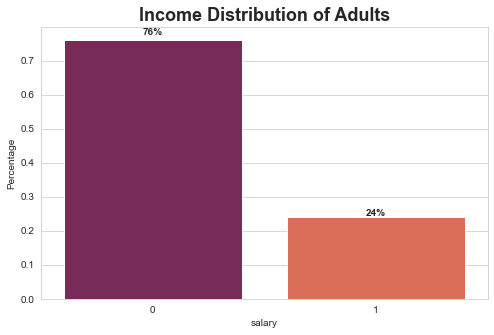

In [8]:
# 1st visualiztion: histplot of salary

sns.set_style("whitegrid")

plt.figure(figsize = (8,5))
plt.title('Income Distribution of Adults', fontsize=18, fontweight='bold')
eda_percentage = adult['salary'].value_counts(normalize = True).rename_axis('salary').reset_index(name = 'Percentage')

ax = sns.barplot(x = 'salary', y = 'Percentage', data = eda_percentage.head(10), palette='rocket')
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height:.0%}', (x + width/2, y + height*1.02), ha='center', fontweight='bold')

The same graph and therefor same explanation as section 4 C.

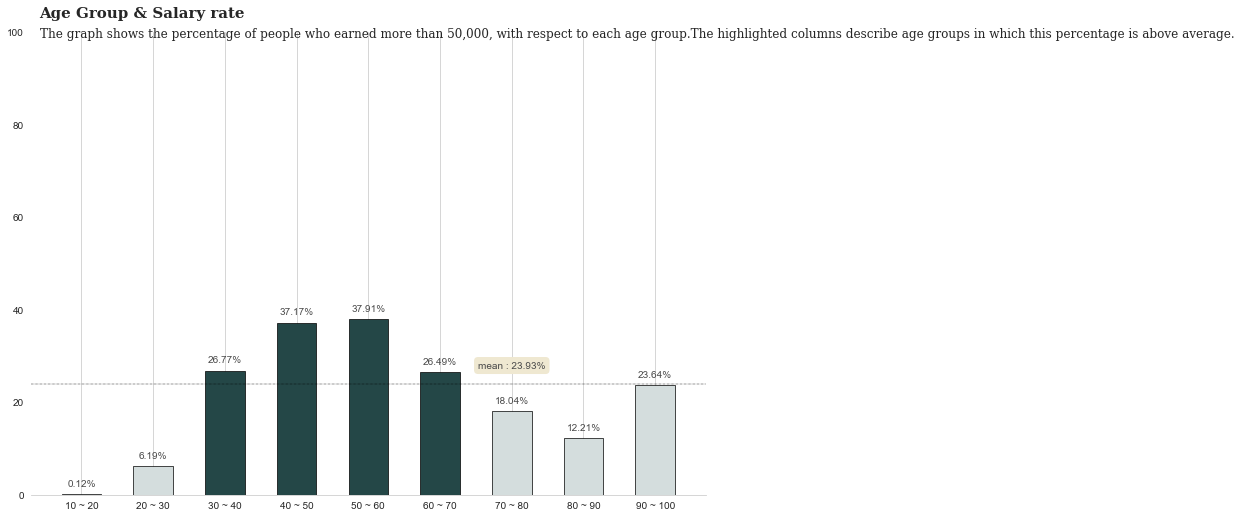

In [9]:
#2nd visualization: by Age-group
def age_band(num):
    for i in range(1, 100):
        if num < 10*i :  return f'{(i-1) * 10} ~ {i*10}'

adult['age_group'] = adult['age'].apply(age_band)
adult_age = adult[['age_group', 'salary']].groupby('age_group')['salary'].value_counts().sort_index().unstack().fillna(0)
adult_age['salary_rate'] = adult_age[1] / (adult_age[0] + adult_age[1]) * 100

fig, ax = plt.subplots(1, 1, figsize=(10, 7))

color_map = ['#d4dddd' for _ in range(9)]
color_map[2] = '#244747' # color highlight
color_map[3] = '#244747' # color highlight
color_map[4] = '#244747' # color highlight
color_map[5] = '#244747' # color highlight


ax.bar(adult_age['salary_rate'].index, adult_age['salary_rate'], 
       color=color_map, width=0.55, 
       edgecolor='black', 
       linewidth=0.7)



for s in ["top","right","left"]:
    ax.spines[s].set_visible(False)


# Annotation Part
for i in adult_age['salary_rate'].index:
    ax.annotate(f"{adult_age['salary_rate'][i]:.02f}%", 
                   xy=(i, adult_age['salary_rate'][i] + 2.3),
                   va = 'center', ha='center',fontweight='light', 
                   color='#4a4a4a')


# mean line + annotation
mean = adult['salary'].mean() *100
ax.axhline(mean ,color='black', linewidth=0.4, linestyle='dashdot')
ax.annotate(f"mean : {mean :.4}%", 
            xy=('70 ~ 80', mean + 4),
            va = 'center', ha='center',
            color='#4a4a4a',
            bbox=dict(boxstyle='round', pad=0.4, facecolor='#efe8d1', linewidth=0))
    

# Title & Subtitle    
fig.text(0.06, 1, 'Age Group & Salary rate', fontsize=15, fontweight='bold', fontfamily='serif')
fig.text(0.06, 0.96, 'The graph shows the percentage of people who earned more than 50,000, with respect to each age group.The highlighted columns describe age groups in which this percentage is above average.',
         fontsize=12, fontweight='light', fontfamily='serif')

grid_y_ticks = np.arange(0, 101, 20)
ax.set_yticks(grid_y_ticks)
ax.grid(axis='y', linestyle='-', alpha=0.4)

plt.tight_layout()
plt.show()

Here we can see what % from each age group (10 years difference between each age group), is earning above 50K yearly. Groups 40-50 and 50-60 are having the highest % with 37.17% and 37.91% respectevly, while also group ages of 30-40(26.77%) and 60-70(26.49%) are earning more than the total average of all the age groups, which stands at 23.93%.

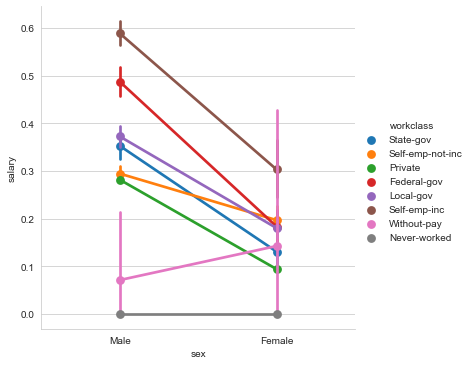

In [10]:
#3rd visualization by Work-class
sns.catplot(x="sex", y="salary", hue="workclass", kind="point", data=adult)

From this visualization we can see the differences in salary between male and female. 
We can see significant differences in any sector in favor towards Male, besides Without-pay category.
We can conclude we might find potential discrimination towards women.

<AxesSubplot:xlabel='race', ylabel='salary'>

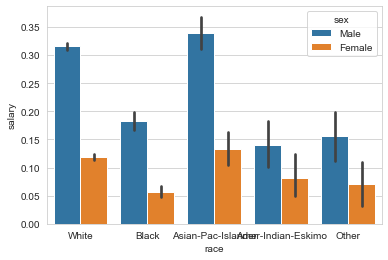

In [11]:
sns.barplot(x='race', y='salary', hue='sex', data=adult)

Here we can see the major differences between Male and female by race, and we can see there's huge differences of almost 3 times more men than women who earn more than 50K yearly for any nationality.

Text(0.5, 1.0, 'Sex and Age vs Salary')

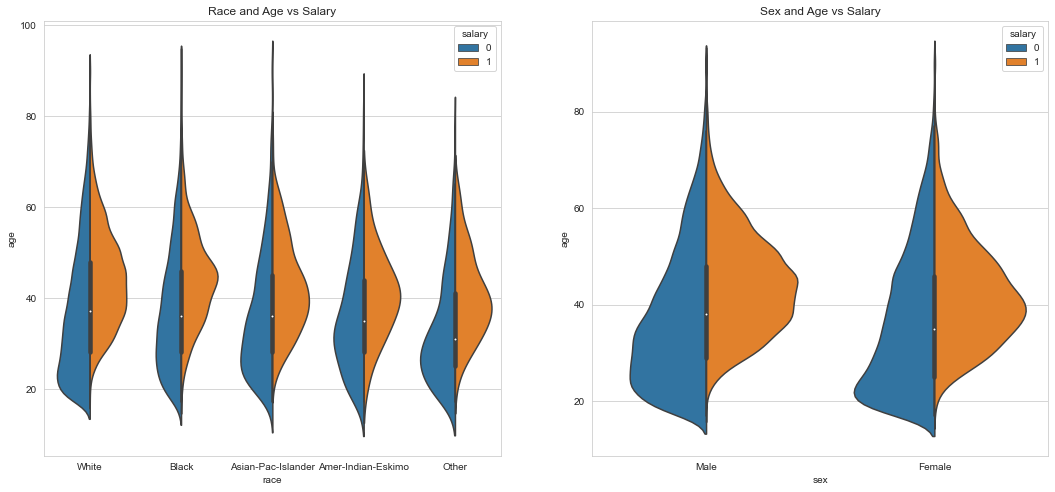

In [12]:
f,ax=plt.subplots(1,2,figsize=(18,8))
sns.violinplot(x='race',y='age',hue='salary',data=adult,split=True,ax=ax[0])
ax[0].set_title('Race and Age vs Salary')
sns.violinplot(x="sex",y="age", hue="salary", data=adult,split=True,ax=ax[1])
ax[1].set_title('Sex and Age vs Salary')

From both graphs we can learn that in every race or gender we have tested, the average age of indivudual that earning above 50K, is around 15 years older than the average salary of a person among the ones who earn less than 50K. 
We can see the range of ages between each of the groups is significantly older among those who earn more than 50K while compared to the ones who earn less.

In [13]:
salary_rate = adult.groupby(['sex']).mean()[['salary']]
male_rate = salary_rate.loc['Male']
female_rate = salary_rate.loc['Female']

In [14]:
male_pos = np.random.uniform(0, male_rate, len(adult[(adult['sex']=='Male') & (adult['salary']==1)]))
male_neg = np.random.uniform(male_rate, 1, len(adult[(adult['sex']=='Male') & (adult['salary']==0)]))
female_pos = np.random.uniform(0, female_rate, len(adult[(adult['sex']=='Female') & (adult['salary']==1)]))
female_neg = np.random.uniform(female_rate, 1, len(adult[(adult['sex']=='Female') & (adult['salary']==0)]))

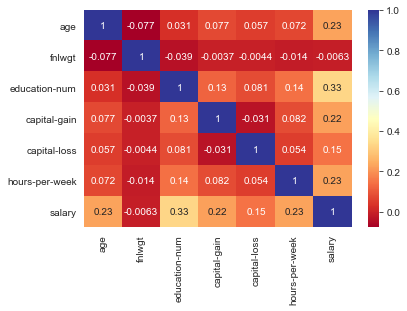

In [15]:
#5th visualization Heatmap 
sns.heatmap(adult.corr(), cmap='RdYlBu', annot=True);

From the heatmap we can learn that besides fnlwgt, that have a very low correlation with salary of -0.0063 and we have decided to remove from our model, we would keep the rest of the varibels.

## 5. Data engineering:

In [16]:
adult = adult.astype({"workclass": str, "education": str})

In [17]:
#5 a
adult = adult.drop('fnlwgt', axis=1)

In [18]:
adult['age'].describe()

count   48,842.000
mean        38.644
std         13.711
min         17.000
25%         28.000
50%         37.000
75%         48.000
max         90.000
Name: age, dtype: float64

In [19]:
def age_group(x):
    x = int(x)
    x = abs(x)
    if( 16 < x < 31 ):
        return "17-30"
    if( 30 < x < 41 ):
        return "31-40"
    if( 40 < x < 51 ):
        return "41-50"
    if( 50 < x < 61 ):
        return "51-60"
    if( 60 < x < 71 ):
        return "61-70"
    return "Greater than 70"
#5 a+b
adult['age_group'] = adult['age'].apply(age_group)
adult = adult.drop('age', axis=1)

In [20]:
# We merge Self-emp-not-inc and inc to Self-emp
adult['workclass'] = adult['workclass'].str.replace('Self-emp-not-inc','Self-emp')
adult['workclass'] = adult['workclass'].str.replace('Self-emp-inc','Self-emp')

#We merge local,State and Fed to "Gov"
adult['workclass'] = adult['workclass'].str.replace('Local-gov','Gov')
adult['workclass'] = adult['workclass'].str.replace('State-gov','Gov')
adult['workclass'] = adult['workclass'].str.replace('Federal-gov','Gov')

adult['workclass'] = adult['workclass'].str.replace('nan','unknown')
adult['workclass'] = adult['workclass'].str.replace('Without-pay','unknown') #21
adult['workclass'] = adult['workclass'].str.replace('Never-worked','unknown') #10

In [21]:
adult['workclass'].value_counts()

Private     33906
Gov          6549
Self-emp     5557
unknown      2830
Name: workclass, dtype: int64

In [22]:
adult['capital-gain'].value_counts(normalize=True)

0       0.917
15024   0.011
7688    0.008
7298    0.007
99999   0.005
         ... 
1111    0.000
6612    0.000
2387    0.000
22040   0.000
1731    0.000
Name: capital-gain, Length: 123, dtype: float64

In [23]:
adult['capital-loss'].value_counts(normalize=True)

0      0.953
1902   0.006
1977   0.005
1887   0.005
2415   0.001
        ... 
155    0.000
1870   0.000
2465   0.000
1911   0.000
2080   0.000
Name: capital-loss, Length: 99, dtype: float64

In [24]:
adult['capital-net'] = adult['capital-gain'] - adult['capital-loss']
adult = adult.drop(['capital-gain','capital-loss'], axis=1)

In [25]:
adult['capital-net'].value_counts(normalize=True)

 0       0.871
 15024   0.011
 7688    0.008
 7298    0.007
-1902    0.006
          ... 
 22040   0.000
-1911    0.000
 2387    0.000
-2080    0.000
-1870    0.000
Name: capital-net, Length: 221, dtype: float64

In [26]:
adult['education'] = adult['education'].str.replace('Preschool','No-Matriculation')
adult['education'] = adult['education'].str.replace('1st-4th','No-Matriculation')
adult['education'] = adult['education'].str.replace('5th-6th','No-Matriculation')
adult['education'] = adult['education'].str.replace('7th-8th','No-Matriculation')
adult['education'] = adult['education'].str.replace('9th','No-Matriculation')
adult['education'] = adult['education'].str.replace('10th','No-Matriculation')
adult['education'] = adult['education'].str.replace('11th','No-Matriculation')
adult['education'] = adult['education'].str.replace('12th','No-Matriculation')

adult['education'] = adult['education'].str.replace('Assoc-voc','Assoc')
adult['education'] = adult['education'].str.replace('Assoc-acdm','Assoc')

In [27]:
adult = adult.fillna('unknown')

In [28]:
country_to_con = {
       'Asia':['Iran', 'Thailand', 'China', 'Taiwan', 'India',
               'Vietnam','Cambodia', 'Philippines', 'Hong', 
               'Laos','Japan', ],
    
       'America':['United-States', 'Outlying-US(Guam-USVI-etc)',
                  'Jamaica', 'Mexico','Canada','Jamaica',
                  'Nicaragua', 'Haiti', 'Cuba','Puerto-Rico', 'Columbia',
                  'Guatemala','Trinadad&Tobago', 'Dominican-Republic',
                  'Honduras','El-Salvador','Ecuador','Peru',],
        
       'Europe': ['Germany','Holand-Netherlands','Italy',
                  'England','Portugal','Poland', 'France',
                  'Scotland','Ireland','Hungary',
                  'Greece',
                  'Yugoslavia',
                   ],
    
       'Africa': ['South', ]
       
}

In [29]:
countries = adult['native_country'].unique()
for country in countries:
    for continent in country_to_con:
        if country in country_to_con[continent]:
            adult['native_country'] = adult['native_country'].replace(country, continent)

## Modeling

In [30]:
X = adult.drop('salary', axis=1)
y = adult.salary

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=0)

In [32]:
def encode_data(enc, data, categorical_cols, is_train=True):
    if is_train:
        transformed_data = enc.fit_transform(data[categorical_cols])
    else:
        transformed_data = enc.transform(data[categorical_cols])
    
    encoded_data = pd.DataFrame(transformed_data.toarray(), columns=enc.get_feature_names(categorical_cols)).reset_index(drop=True)
    print(encoded_data.shape)
    
    data_other_cols = data.drop(columns=categorical_cols).reset_index(drop=True)
    print(data_other_cols.shape)

    #Concatenate the two dataframes : 
    return pd.concat([data_other_cols, encoded_data], axis=1)

In [33]:
one_hot_encoder = OneHotEncoder(handle_unknown='ignore')

categorical_cols = ['sex', 'workclass', 'education',
                    'marital-status', 'occupation', 'relationship',
                    'race', 'native_country', 'age_group',]

encoded_train = encode_data(one_hot_encoder, X_train, categorical_cols)
encoded_test = encode_data(one_hot_encoder, X_test, categorical_cols, is_train=False)

(32724, 58)
(32724, 3)
(16118, 58)
(16118, 3)


The benchmark would be the most common label in the train set

In [34]:
models = []

In [35]:
def get_benchmark_predictions(x, benchmark_value):
    # returns a numpy array on the same length as x with all values equal to benchmark_value
    return np.ones(x.shape[0])*benchmark_value

benchmark_value = 0

y_train_pred = get_benchmark_predictions(encoded_train, benchmark_value)
y_test_pred = get_benchmark_predictions(encoded_test, benchmark_value)

train_acc = accuracy_score(y_train, y_train_pred)
test_acc = accuracy_score(y_test, y_test_pred)

models.append(
{
    'model_name':'benchmark',
    'test_acc': test_acc,
}
)

In [36]:
def get_score(clf, X, y):
    y_pred = clf.predict(X)
    score = accuracy_score(y, y_pred)
    return score

In [37]:
def get_name(clf):
    return str(clf.__class__.__name__)

In [38]:
# This will plot the accuracies as a function of k.
def plot_test_train(k, test_acc, train_acc, clf, knn):
    fig = plt.figure(figsize=(10,7))
    ax1 = fig.add_subplot(111)
    ax1.scatter(k, train_acc, s=30, c='b', marker="s", label='Training Accuracy')
    ax1.scatter(k, test_acc, s=30, c='r', marker="o", label='Testing Accuracy')
    ax1.set_ylabel("Accuracy")
    if knn:
        ax1.set_xlabel('K')  
    elif knn==False:
        ax1.set_xlabel('Depth')
    elif knn==None:
        ax1.set_xlabel('Size for Train set')
    ax1.set_title("{name} Test vs Train Accuracy".format(name=get_name(clf)))
    plt.show()

## 6. Algorithm performance

## 6.b.1-KNN

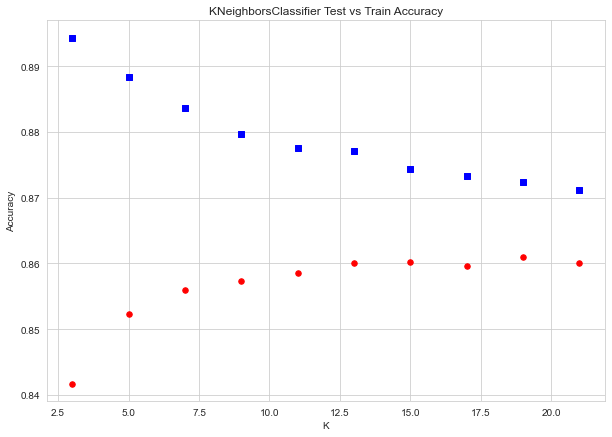

In [39]:
from sklearn.neighbors import KNeighborsClassifier
train_acc = []
test_acc = []
k = range(3,22,2)
for i in k:
    clf = KNeighborsClassifier(n_neighbors=i)
    clf.fit(encoded_train, y_train)
    
    train_acc.append(get_score(clf, encoded_train, y_train))
    test_acc.append(get_score(clf, encoded_test, y_test))
    
    models.append({
        'model_name': (get_name(clf)) + ", K=" +str(i),
        'test_acc': get_score(clf, encoded_test, y_test),
            
        }
        )
    
plot_test_train(k, test_acc, train_acc, clf, knn=True)

- ***KNN*** - Here the best K that provides us the highest accuracy is 19, which is a bit higher than 0.86-	KNN - Here the best K that provides us the highest accuracy is 19, which is a bit higher than 0.86.

In [40]:
pd.DataFrame(models).sort_values(by='test_acc', ascending=False)

,model_name,test_acc
9,"KNeighborsClassifier, K=19",0.861
7,"KNeighborsClassifier, K=15",0.860
10,"KNeighborsClassifier, K=21",0.860
6,"KNeighborsClassifier, K=13",0.860
8,"KNeighborsClassifier, K=17",0.860
5,"KNeighborsClassifier, K=11",0.859
4,"KNeighborsClassifier, K=9",0.857
3,"KNeighborsClassifier, K=7",0.856
2,"KNeighborsClassifier, K=5",0.852
1,"KNeighborsClassifier, K=3",0.842


## 6.b.2- scaled KNN

In [41]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(encoded_train)
x_test_scaled = scaler.transform(encoded_test)

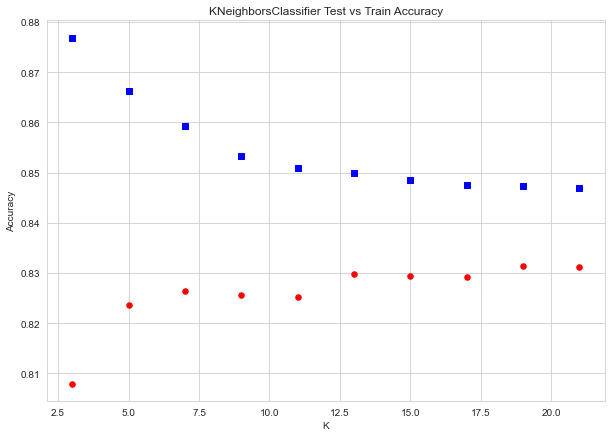

In [42]:
from sklearn.neighbors import KNeighborsClassifier
train_acc = []
test_acc = []
for i in k:
    clf = KNeighborsClassifier(n_neighbors=i)
    clf.fit(x_train_scaled, y_train)
    
    train_acc.append(get_score(clf, x_train_scaled, y_train))
    test_acc.append(get_score(clf, x_test_scaled, y_test))
    
    models.append({
        'model_name': (get_name(clf)) + "Scaled, K=" +str(i),
        'test_acc': get_score(clf, x_test_scaled, y_test),
            
        }
        )
plot_test_train(k, test_acc, train_acc, clf, knn=True)

- ***When normalized***,  KNN with the highest accuracy is also 19,  it's accuracy is a little higher than 0.83, which is less accurate than our last model when KNN was not normalized.

In [43]:
pd.DataFrame(models).sort_values(by='test_acc', ascending=False)

,model_name,test_acc
9,"KNeighborsClassifier, K=19",0.861
7,"KNeighborsClassifier, K=15",0.860
10,"KNeighborsClassifier, K=21",0.860
6,"KNeighborsClassifier, K=13",0.860
8,"KNeighborsClassifier, K=17",0.860
5,"KNeighborsClassifier, K=11",0.859
4,"KNeighborsClassifier, K=9",0.857
3,"KNeighborsClassifier, K=7",0.856
2,"KNeighborsClassifier, K=5",0.852
1,"KNeighborsClassifier, K=3",0.842


## 6.b.3 - Decision Tree Classifier

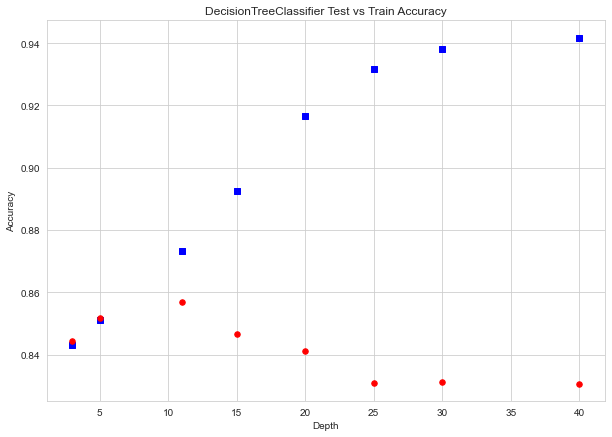

In [44]:
train_acc = []
test_acc = []
k = [3,5,11,15,20,25,30,40]
for i in k:
    clf = DecisionTreeClassifier(random_state=0,max_depth=i)
    clf.fit(encoded_train, y_train)
    
    train_acc.append(get_score(clf, encoded_train, y_train))
    test_acc.append(get_score(clf, encoded_test, y_test))
    
    models.append({
        'model_name': (get_name(clf)) + ", Max Depth=" +str(i),
        'test_acc': get_score(clf, encoded_test, y_test),
            
        }
        )

plot_test_train(k, test_acc, train_acc, clf, knn=False)

- ***Decision Tree Classifier***  From these results we can learn that the Depth with the highest accuracy we will take is 11, because it has the highest accuracy a bit lower than 0.86, while afterwards we have a classic case of over fit – the train’s accuracy goes up, while the test’s is declining.

In [45]:
pd.DataFrame(models).sort_values(by='test_acc', ascending=False)

,model_name,test_acc
9,"KNeighborsClassifier, K=19",0.861
7,"KNeighborsClassifier, K=15",0.860
10,"KNeighborsClassifier, K=21",0.860
6,"KNeighborsClassifier, K=13",0.860
8,"KNeighborsClassifier, K=17",0.860
5,"KNeighborsClassifier, K=11",0.859
4,"KNeighborsClassifier, K=9",0.857
23,"DecisionTreeClassifier, Max Depth=11",0.857
3,"KNeighborsClassifier, K=7",0.856
2,"KNeighborsClassifier, K=5",0.852


## 6.b.4 - Random Forest Classifier

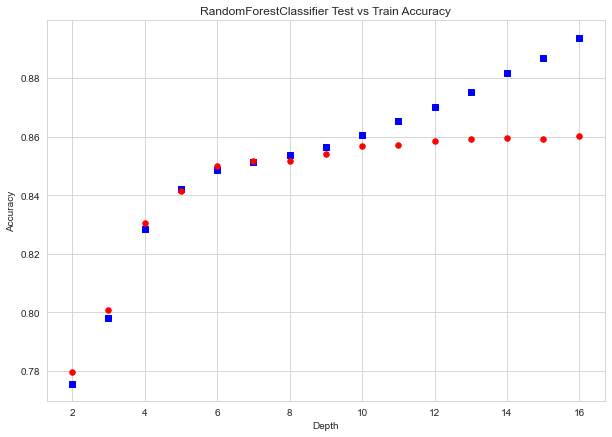

In [46]:
from sklearn.ensemble import RandomForestClassifier
train_acc = []
test_acc = []
k = range(2,17,1)
for i in k:
    clf = RandomForestClassifier(random_state=0,max_depth=i, n_estimators=100)
    clf.fit(encoded_train, y_train)
    
    train_acc.append(get_score(clf, encoded_train, y_train))
    test_acc.append(get_score(clf, encoded_test, y_test))
    
    models.append({
        'model_name': (get_name(clf)) + "Max Depth=" +str(i),
        'test_acc': get_score(clf, encoded_test, y_test),
            
        }
        )
    
plot_test_train(k, test_acc, train_acc, clf, knn=False)

-	***Random Forest Classifier*** - The best Depth we would choose will be 16, the last one, with an accuracy of 0.86, but we will highly consider expanding our data for the train, since we did not reach overfit.

In [47]:
pd.DataFrame(models).sort_values(by='test_acc', ascending=False)

,model_name,test_acc
9,"KNeighborsClassifier, K=19",0.861
7,"KNeighborsClassifier, K=15",0.860
43,RandomForestClassifierMax Depth=16,0.860
10,"KNeighborsClassifier, K=21",0.860
6,"KNeighborsClassifier, K=13",0.860
8,"KNeighborsClassifier, K=17",0.860
41,RandomForestClassifierMax Depth=14,0.860
40,RandomForestClassifierMax Depth=13,0.859
42,RandomForestClassifierMax Depth=15,0.859
5,"KNeighborsClassifier, K=11",0.859


## 6.b.5 - AdaBoost

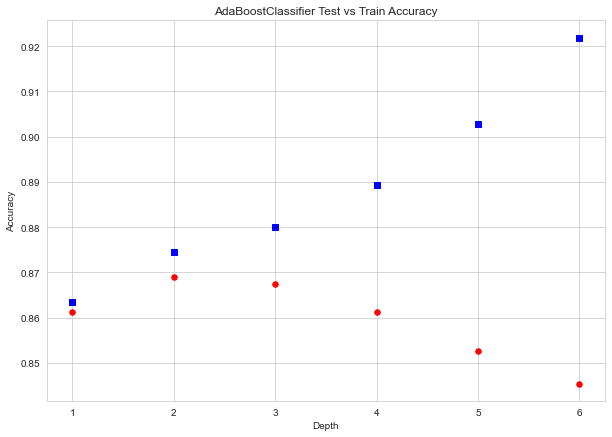

In [48]:
from sklearn.ensemble import AdaBoostClassifier
train_acc = []
test_acc = []
k = range(1,7)
for i in k:
    clf = DecisionTreeClassifier(max_depth=i)
    clf = AdaBoostClassifier(random_state=0,base_estimator=clf ,n_estimators=100)
    clf.fit(encoded_train, y_train)
    train_acc.append(get_score(clf, encoded_train, y_train))
    test_acc.append(get_score(clf, encoded_test, y_test))
    
    models.append({
        'model_name': (get_name(clf)) + "Max Depth=" +str(i),
        'test_acc': get_score(clf, encoded_test, y_test),
            
        }
        )
    

plot_test_train(k, test_acc, train_acc, clf, knn=False)

- ***AdaBoost*** - The Depth we would choose will be 2 while the accuracy almost reaches 0.87, because here after 2 we can easily see the overfit, when the train’s accuracy trend is ascending, while for the train it is declining.


In [49]:
pd.DataFrame(models).sort_values(by='test_acc', ascending=False)

,model_name,test_acc
45,AdaBoostClassifierMax Depth=2,0.869
46,AdaBoostClassifierMax Depth=3,0.867
44,AdaBoostClassifierMax Depth=1,0.861
47,AdaBoostClassifierMax Depth=4,0.861
9,"KNeighborsClassifier, K=19",0.861
7,"KNeighborsClassifier, K=15",0.860
43,RandomForestClassifierMax Depth=16,0.860
10,"KNeighborsClassifier, K=21",0.860
6,"KNeighborsClassifier, K=13",0.860
41,RandomForestClassifierMax Depth=14,0.860


## 7. Algorithm introspection

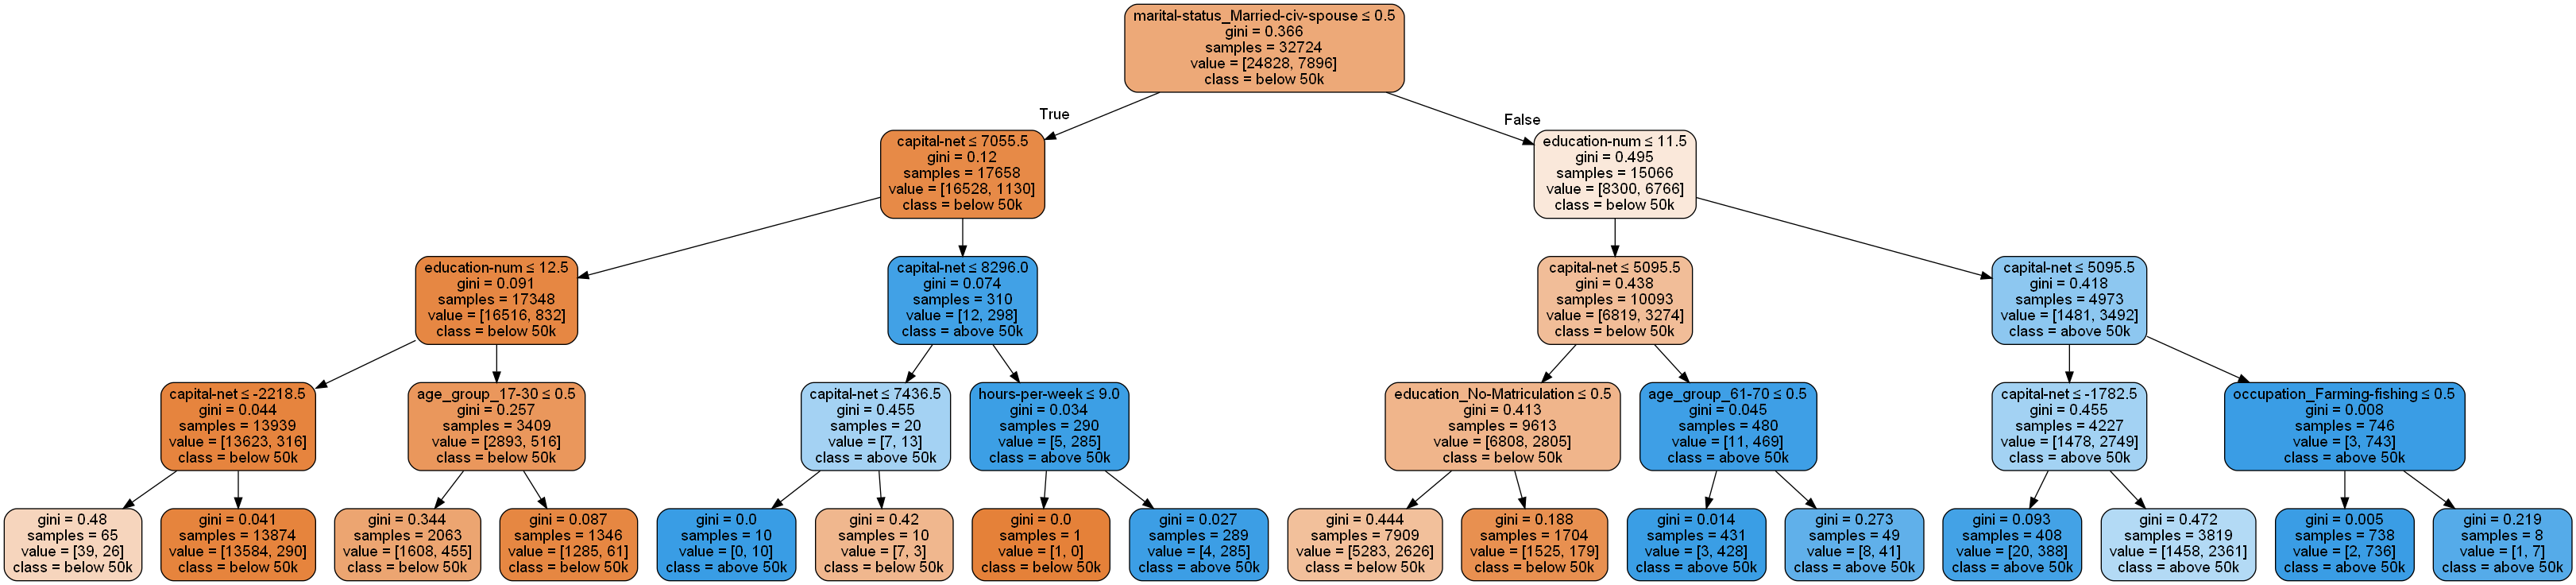

In [50]:
import pydotplus
from six import StringIO
from sklearn.tree import export_graphviz
from IPython.display import Image  
clf = DecisionTreeClassifier(max_depth=4)
clf.fit(encoded_train, y_train)
dot_data = StringIO()
export_graphviz(clf, 
                out_file=dot_data,  
                filled=True, 
                rounded=True,
                special_characters=True,
                feature_names = list(encoded_train.columns),
                class_names=['below 50k','above 50k'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

- first leaf is the 2nd leaf from left, we had decided to specify this particular leaf because it has a very low gini of 0.041, while also having large number of samples, and a clear distinction between the people who are earning more than 50K (290) while compared to the amount of people who are earning less than 50K (13584). The levels people from this specific leaf has been through is: They are married (1st node), with a smaller capital net of 7055.5 (2nd node), who have less than 12.5 years of education (3rd node), and a capital net which is higher than -2218.5 (4th node).

- 2nd leaf is 2nd leaf from right, We choose to specify on this particular leaf because it has a very low gini of 0.005, while there’s a reasonable amount of samples (738), when only 2 of these samples aren’t earning more than 50K yearly. The levels people from this specific node has been through is: They aren’t married (1st node), have more than 12 years of education (2nd node), having a capital net higher than 5095.5 (3rd node), and their occupation isn’t farming or fishing. (4th node)

Text(0.5, 1.0, 'Feature Importance of Random Forest Tree')

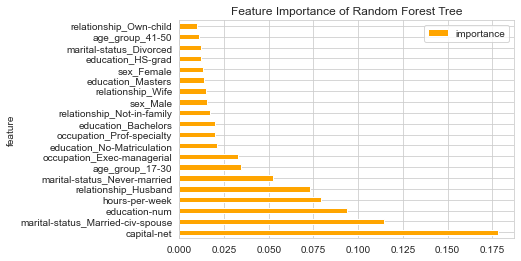

In [51]:
clf = RandomForestClassifier(random_state=0,max_depth=16, n_estimators=100)
clf = clf.fit(encoded_train, y_train)
importance = clf.feature_importances_
features = encoded_train.columns
importance_df = pd.DataFrame({'feature':features, 'importance':importance})
for_graph = importance_df.sort_values('importance', ascending=False)[:20]
for_graph.plot(y='importance', x='feature', kind='barh', color='orange')
plt.title('Feature Importance of Random Forest Tree')

-	Feature Importance -  From the feature importance, we can see capital-net has the biggest importance, than rather the individual is married or not, after that the years of education, hours per week spent on work.

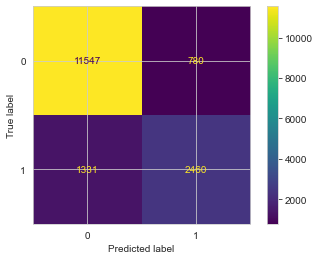

In [52]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
ada_2 = DecisionTreeClassifier(max_depth=2)
ada_2 = AdaBoostClassifier(base_estimator=ada_2, n_estimators=100, random_state=0)
ada_2.fit(encoded_train, y_train)
y_pred = ada_2.predict(encoded_test)
cm = confusion_matrix(y_test, y_pred, labels=clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                           display_labels=clf.classes_)

disp.plot()
plt.show()

- Confuison Matrix – We succeed to make a lot of TN in our confusion matrix because of the unbalance in the targetlables. 

## 8. Hyper Paramters

In [53]:
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler

clf = DecisionTreeClassifier(random_state=0)

params = [{'max_depth': [2,3,4,5,6,7,15,20,30],
         'criterion': ['gini', 'entropy'],
         'max_features': ['auto', 'sqrt', 'log2'],
           
          }]

gs_dtc = GridSearchCV(clf,
                      param_grid=params,
                      scoring='accuracy',
                      cv=5)

gs_dtc.fit(encoded_train, y_train)
y_pred = gs_dtc.predict(encoded_test)

print(gs_dtc.best_params_)
print(gs_dtc.best_score_)
print(accuracy_score(y_test, y_pred))

{'criterion': 'gini', 'max_depth': 15, 'max_features': 'log2'}
0.8386200434830522
0.8450179923067378


In [54]:
pd.DataFrame(gs_dtc.cv_results_).sort_values(by='rank_test_score')

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_max_features,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
20,0.049,0.010,0.008,0.002,gini,15,log2,"{'criterion': 'gini', 'max_depth': 15, 'max_fe...",0.837,0.846,0.832,0.837,0.841,0.839,0.005,1
50,0.047,0.003,0.007,0.000,entropy,20,log2,"{'criterion': 'entropy', 'max_depth': 20, 'max...",0.844,0.831,0.839,0.845,0.834,0.839,0.005,2
23,0.046,0.002,0.007,0.001,gini,20,log2,"{'criterion': 'gini', 'max_depth': 20, 'max_fe...",0.844,0.838,0.833,0.838,0.837,0.838,0.004,3
47,0.041,0.003,0.006,0.000,entropy,15,log2,"{'criterion': 'entropy', 'max_depth': 15, 'max...",0.842,0.836,0.832,0.837,0.832,0.836,0.004,4
49,0.064,0.007,0.007,0.001,entropy,20,sqrt,"{'criterion': 'entropy', 'max_depth': 20, 'max...",0.837,0.835,0.831,0.837,0.833,0.835,0.003,5
48,0.055,0.004,0.006,0.001,entropy,20,auto,"{'criterion': 'entropy', 'max_depth': 20, 'max...",0.837,0.835,0.831,0.837,0.833,0.835,0.003,5
46,0.054,0.006,0.006,0.000,entropy,15,sqrt,"{'criterion': 'entropy', 'max_depth': 15, 'max...",0.830,0.835,0.838,0.831,0.836,0.834,0.003,7
45,0.058,0.014,0.007,0.001,entropy,15,auto,"{'criterion': 'entropy', 'max_depth': 15, 'max...",0.830,0.835,0.838,0.831,0.836,0.834,0.003,7
22,0.053,0.002,0.006,0.000,gini,20,sqrt,"{'criterion': 'gini', 'max_depth': 20, 'max_fe...",0.835,0.833,0.826,0.839,0.827,0.832,0.005,9
21,0.054,0.003,0.007,0.001,gini,20,auto,"{'criterion': 'gini', 'max_depth': 20, 'max_fe...",0.835,0.833,0.826,0.839,0.827,0.832,0.005,9


In [55]:
clf = DecisionTreeClassifier(random_state=0, max_depth=2)

clf = AdaBoostClassifier(base_estimator=clf)

params = [{'n_estimators': [50,200,500,700],
         'learning_rate': [0.05,0.1,0.5,0.7],
         'algorithm': ['SAMME', 'SAMME.R'],
           
          }]

gs_ada = GridSearchCV(clf,
                      param_grid=params,
                      scoring='accuracy',
                      cv=3)

gs_ada.fit(encoded_train, y_train)
y_pred = gs_dtc.predict(encoded_test)

print(gs_ada.best_params_)
print(gs_ada.best_score_)
print(accuracy_score(y_test, y_pred))

{'algorithm': 'SAMME.R', 'learning_rate': 0.1, 'n_estimators': 700}
0.8709509839872877
0.8450179923067378


In [56]:
pd.DataFrame(gs_dtc.cv_results_).sort_values(by='rank_test_score')

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_max_features,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
20,0.049,0.010,0.008,0.002,gini,15,log2,"{'criterion': 'gini', 'max_depth': 15, 'max_fe...",0.837,0.846,0.832,0.837,0.841,0.839,0.005,1
50,0.047,0.003,0.007,0.000,entropy,20,log2,"{'criterion': 'entropy', 'max_depth': 20, 'max...",0.844,0.831,0.839,0.845,0.834,0.839,0.005,2
23,0.046,0.002,0.007,0.001,gini,20,log2,"{'criterion': 'gini', 'max_depth': 20, 'max_fe...",0.844,0.838,0.833,0.838,0.837,0.838,0.004,3
47,0.041,0.003,0.006,0.000,entropy,15,log2,"{'criterion': 'entropy', 'max_depth': 15, 'max...",0.842,0.836,0.832,0.837,0.832,0.836,0.004,4
49,0.064,0.007,0.007,0.001,entropy,20,sqrt,"{'criterion': 'entropy', 'max_depth': 20, 'max...",0.837,0.835,0.831,0.837,0.833,0.835,0.003,5
48,0.055,0.004,0.006,0.001,entropy,20,auto,"{'criterion': 'entropy', 'max_depth': 20, 'max...",0.837,0.835,0.831,0.837,0.833,0.835,0.003,5
46,0.054,0.006,0.006,0.000,entropy,15,sqrt,"{'criterion': 'entropy', 'max_depth': 15, 'max...",0.830,0.835,0.838,0.831,0.836,0.834,0.003,7
45,0.058,0.014,0.007,0.001,entropy,15,auto,"{'criterion': 'entropy', 'max_depth': 15, 'max...",0.830,0.835,0.838,0.831,0.836,0.834,0.003,7
22,0.053,0.002,0.006,0.000,gini,20,sqrt,"{'criterion': 'gini', 'max_depth': 20, 'max_fe...",0.835,0.833,0.826,0.839,0.827,0.832,0.005,9
21,0.054,0.003,0.007,0.001,gini,20,auto,"{'criterion': 'gini', 'max_depth': 20, 'max_fe...",0.835,0.833,0.826,0.839,0.827,0.832,0.005,9


##  Further analysis

In [57]:
clf = DecisionTreeClassifier(random_state=0, max_depth=2)
clf = AdaBoostClassifier(base_estimator=clf ,n_estimators=100)

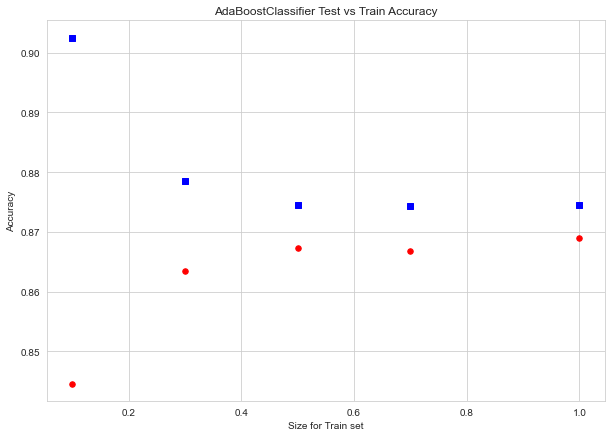

In [58]:
fracs = [0.1, 0.3, 0.5, 0.7, 1]
sizes = [int(frac*len(encoded_train)) for frac in fracs]
train_acc = []
test_acc = []
for size in sizes:
    X_train_frac = encoded_train.head(size)
    y_train_frac = y_train.head(size)
    clf.fit(X_train_frac, y_train_frac)
    
    train_acc.append(get_score(clf, X_train_frac, y_train_frac))
    test_acc.append(get_score(clf, encoded_test, y_test))
    
    models.append({
        'model_name': (get_name(clf)) + " Train Size=" +str(size/len(encoded_train)),
        'test_acc': get_score(clf, encoded_test, y_test),
            
        }
        )
    
plot_test_train(fracs, test_acc, train_acc, clf, knn=None)

-	Further Analysis – From this graph we can conclude because the test is just acsending and acsending without any decilining which can hint underfit, we probably need more data for our training set.

In [59]:
ada_1 = DecisionTreeClassifier(max_depth=1)
ada_1 = AdaBoostClassifier(base_estimator=ada_1, n_estimators=100, random_state=0)
ada_1.fit(encoded_train, y_train)
y_pred1 = ada_1.predict(encoded_test)

In [60]:
ada_2 = DecisionTreeClassifier(max_depth=2)
ada_2 = AdaBoostClassifier(base_estimator=ada_2, n_estimators=100, random_state=0)
ada_2.fit(encoded_train, y_train)
y_pred2 = ada_2.predict(encoded_test)

In [61]:
ada_3 = DecisionTreeClassifier(max_depth=3)
ada_3 = AdaBoostClassifier(base_estimator=ada_3, n_estimators=100, random_state=0)
ada_3.fit(encoded_train, y_train)
y_pred3 = ada_3.predict(encoded_test)

In [62]:
y_pred = np.round(np.mean( np.array([y_pred1, y_pred2, y_pred3]), axis=0))

In [63]:
round(accuracy_score(y_test, y_pred), 4)

0.8703

In [64]:
pd.DataFrame(models).sort_values(by='test_acc', ascending=False)

,model_name,test_acc
54,AdaBoostClassifier Train Size=1.0,0.869
45,AdaBoostClassifierMax Depth=2,0.869
46,AdaBoostClassifierMax Depth=3,0.867
52,AdaBoostClassifier Train Size=0.5,0.867
53,AdaBoostClassifier Train Size=0.6999755531108667,0.867
51,AdaBoostClassifier Train Size=0.29999388827771667,0.863
44,AdaBoostClassifierMax Depth=1,0.861
47,AdaBoostClassifierMax Depth=4,0.861
9,"KNeighborsClassifier, K=19",0.861
43,RandomForestClassifierMax Depth=16,0.860
